<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/python-code-for-FinancialAnalysis-book/blob/master/2020_06_22_chap18_exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tabulate import tabulate
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import datetime as dt
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def usr_input():
  ticker_1 = input('Enter 1st ticker:(defalut AAPL) ') or 'AAPL'
  return ticker_1

In [ ]:
def get_jsonparsed_data(url):

    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [ ]:
apikey='6f687ccb520121389797f851cf764bf7'

In [ ]:
def get_dictdata(ticker,alpha,beta):

  url = ('https://financialmodelingprep.com/api/v3/income-statement/'+ticker+'?apikey=' + apikey)
  Data = get_jsonparsed_data(url)
  eps = []
  date = []
  for element in range(len(Data)):
    eps.append(Data[element]['eps'])
    date.append(Data[element]['date'])

  ##find Y to calculate first T
  Y = eps[0:5]
  ##make X
  X = [1,2,3,4,5]
  X = sm.add_constant(X)
  ## do ols
  model = sm.OLS(Y, X)
  results = model.fit()
  _,T1 = results.params

  T = []
  S = []

  T.append(T1)
  S.append(eps[0])

  for ele in range(1,len(eps)):
   s = alpha*eps[ele]+(1-alpha)*(S[ele-1]+T[ele-1])
   t = beta*(s-S[ele-1])+(1-beta)*T[ele-1]
   T.append(t)
   S.append(s)


  dictdata = {ticker+' EPS':eps,ticker+' S':S,ticker+' T':T}

  return dictdata,date

In [ ]:
ticker = usr_input()
test,date = get_dictdata(ticker,0.3,0.2)
Index = pd.date_range(start=date[len(date)-1], periods=len(date),freq='Y',closed=None)
framedata = pd.DataFrame(test,index=Index)
framedata = framedata.sort_index(ascending=False)

Enter 1st ticker:(defalut AAPL) JPM


In [ ]:
print(tabulate(framedata, showindex=True, headers=framedata.columns,tablefmt="github"))

|                     |   JPM EPS |    JPM S |     JPM T |
|---------------------|-----------|----------|-----------|
| 2019-12-31 00:00:00 |      0.8  |  1.46086 | -0.224078 |
| 2018-12-31 00:00:00 |      3.24 |  1.91152 | -0.167432 |
| 2017-12-31 00:00:00 |      1.59 |  1.62348 | -0.281301 |
| 2016-12-31 00:00:00 |      2.43 |  1.91626 | -0.278432 |
| 2015-12-31 00:00:00 |      3.93 |  2.01855 | -0.322467 |
| 2014-12-31 00:00:00 |      4.51 |  1.68566 | -0.486305 |
| 2013-12-31 00:00:00 |      0.86 |  1.20362 | -0.728392 |
| 2012-12-31 00:00:00 |      2.25 |  2.04983 | -0.698938 |
| 2011-12-31 00:00:00 |      3.98 |  2.68014 | -0.716095 |
| 2010-12-31 00:00:00 |      4.5  |  2.95057 | -0.827512 |
| 2009-12-31 00:00:00 |      5.22 |  3.24684 | -0.960321 |
| 2008-12-31 00:00:00 |      4.39 |  3.53065 | -1.12945  |
| 2007-12-31 00:00:00 |      5.34 |  4.36547 | -1.20311  |
| 2006-12-31 00:00:00 |      6.05 |  5.23445 | -1.28664  |
| 2005-12-31 00:00:00 |      6.24 |  6.24147 | -1.35654 

In [ ]:
framedata.to_csv('chap18_exponentialreport.csv')
print("Saving exponentialreport to 'Download' folder") 
files.download('chap18_exponentialreport.csv')
print("Finish saving chap18_exponentialreport to 'Download' folder")

Saving exponentialreport to 'Download' folder


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Finish saving chap18_exponentialreport to 'Download' folder


In [ ]:
sinit = framedata[ticker+' EPS'][0]
tinit = framedata[ticker+' T'][0]

Sfore = [sinit]
for ele in range(1,4):
  sfore = sinit + ele*tinit
  Sfore.append(sfore)


In [ ]:
i = pd.date_range(start=date[0], periods=4,freq='Y')
frame = pd.DataFrame({'prediction':Sfore},index=i)

In [ ]:
print(frame)

            prediction
2019-12-31    0.800000
2020-12-31    0.575922
2021-12-31    0.351845
2022-12-31    0.127767


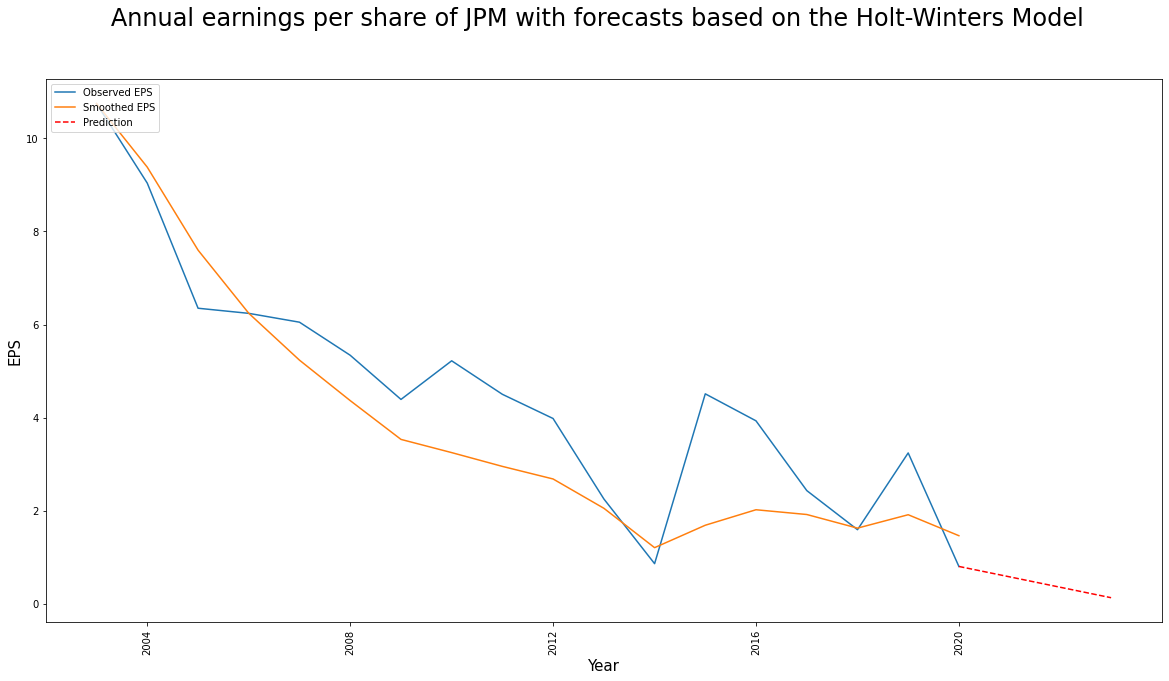

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(framedata[ticker+' EPS'], label = "Observed EPS")
plt.plot(framedata[ticker+' S'], label = "Smoothed EPS")
plt.plot(frame,'r--',label = 'Prediction')
plt.xticks(rotation=90)# rotate the ylim so that it does not look too tight
plt.xlabel('Year',fontsize = 15)
plt.ylabel('EPS',fontsize = 15)
plt.suptitle(f'   Annual earnings per share of {ticker} with forecasts based on the Holt-Winters Model',fontsize = 24)
plt.legend(loc="upper left")